In [7]:
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [8]:
# Load dataset
current = os.getcwd()
data_folder = os.path.join(current, "normalized_images_64")
chess_types_folders = glob.glob(os.path.join(data_folder, "*"))
# print(chess_types_folders)
pieces_info = []
labels = {"King": 1, "Knight":2, "Bishop":3, "Rook":4, "Pawn":5, "Queen":6}
for chess_types in chess_types_folders:
    pieces = glob.glob(f'{chess_types}/*')
    # print(pieces)
    type = chess_types.split("/")[-1]
    for piece in pieces:
        p = {"normalized_img": np.load(piece).reshape(-1), "label": labels[type]}
        pieces_info.append(p)
chess_df = pd.DataFrame(pieces_info)

chess_1 = chess_df[chess_df['label'] == 1]
chess_2 = chess_df[chess_df['label'] == 2]
chess_3 = chess_df[chess_df['label'] == 3]
chess_4 = chess_df[chess_df['label'] == 4]
chess_5 = chess_df[chess_df['label'] == 5]
chess_6 = chess_df[chess_df['label'] == 6]

train_df_1, test_df_1 = train_test_split(chess_1, test_size=0.3, random_state=1)
train_df_2, test_df_2 = train_test_split(chess_2, test_size=0.3, random_state=1)
train_df_3, test_df_3 = train_test_split(chess_3, test_size=0.3, random_state=1)
train_df_4, test_df_4 = train_test_split(chess_4, test_size=0.3, random_state=1)
train_df_5, test_df_5 = train_test_split(chess_5, test_size=0.3, random_state=1)
train_df_6, test_df_6 = train_test_split(chess_6, test_size=0.3, random_state=1)

train_dfs_list = [train_df_1, train_df_2, train_df_3, train_df_4, train_df_5, train_df_6]
test_dfs_list = [test_df_1, test_df_2, test_df_3, test_df_4, test_df_5, test_df_6]

train_df = pd.concat(train_dfs_list, ignore_index=True)
test_df = pd.concat(test_dfs_list, ignore_index=True)

# Load dataset
X_train, y_train = np.array(train_df['normalized_img']), np.array(train_df['label'])
X_test, y_test = np.array(test_df['normalized_img']), np.array(test_df['label'])

X_train = np.array([x for x in X_train])
X_test = np.array([x for x in X_test])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

In [16]:
X_1 = X_test_pca[y_test == 1]
X_2 = X_test_pca[y_test == 2]
X_3 = X_test_pca[y_test == 3]
X_4 = X_test_pca[y_test == 4]
X_5 = X_test_pca[y_test == 5]
X_6 = X_test_pca[y_test == 6]

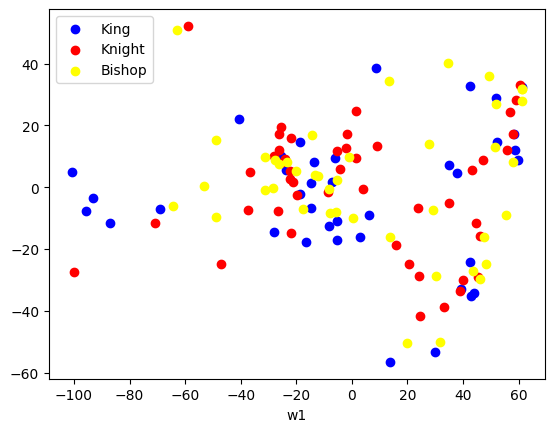

In [20]:
plt.figure()
plt.scatter(X_1[:, 0], X_1[:, 1], c="blue", label="King")
plt.scatter(X_2[:, 0], X_2[:, 1], c="red", label="Knight")
plt.scatter(X_3[:, 0], X_3[:, 1], c="yellow", label="Bishop")
# plt.scatter(X_4[:, 0], X_4[:, 1], c="orange", label="Rook")
# plt.scatter(X_5[:, 0], X_5[:, 1], c="purple", label="Pawn")
# plt.scatter(X_6[:, 0], X_6[:, 1], c="green", label="Queen")
plt.xlabel("w0")
plt.xlabel("w1")
plt.legend()
plt.show()

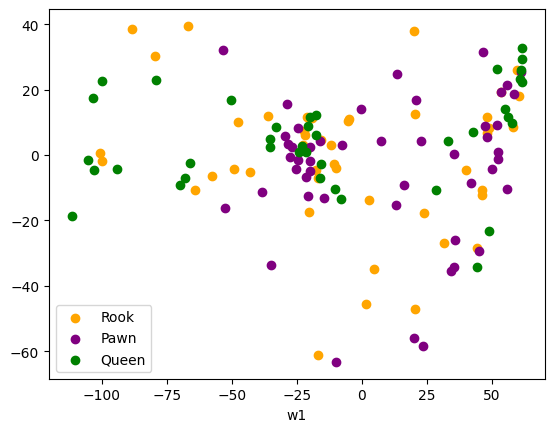

In [19]:
plt.figure()
# plt.scatter(X_1[:, 0], X_1[:, 1], c="blue", label="King")
# plt.scatter(X_2[:, 0], X_2[:, 1], c="red", label="Knight")
# plt.scatter(X_3[:, 0], X_3[:, 1], c="yellow", label="Bishop")
plt.scatter(X_4[:, 0], X_4[:, 1], c="orange", label="Rook")
plt.scatter(X_5[:, 0], X_5[:, 1], c="purple", label="Pawn")
plt.scatter(X_6[:, 0], X_6[:, 1], c="green", label="Queen")
plt.xlabel("w0")
plt.xlabel("w1")
plt.legend()
# plt.savefit('hw2_q2.png')
plt.show()